In [16]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv('D:\Hoc\stock-forcast-ML\MBB.csv')
df=pd.DataFrame(df)
# df = df.reindex(index=df.index[::-1])
df["Vol"] = df["Vol."].str.replace("M", "").astype(float) * 1e6
df = df.drop("Vol.", axis=1)
# Làm tròn giá
df["Price"] = df["Price"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Open"] = df["Open"].str.replace(",", "").astype(float).round(-1).astype(int)
df["High"] = df["High"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Low"] = df["Low"].str.replace(",", "").astype(float).round(-1).astype(int)
df["Change"] = df["Change %"].str.replace("%", "").astype(float) / 100
df = df.drop('Change %', axis=1)
# Bước 2: Chuyển đổi cột Date sang định dạng datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head(10)

,Date,Price,Open,High,Low,Vol,Change
0,2024-11-27,24000,23800,24500,23800,1210000.0,-0.0041
1,2024-11-26,24100,24800,25000,24000,4440000.0,0.0063
2,2024-11-25,23950,24000,24050,23900,5170000.0,-0.0021
3,2024-11-22,24000,23950,24200,23900,9210000.0,0.0000
4,2024-11-21,24000,23600,24000,23400,6580000.0,0.0191
5,2024-11-20,23550,23150,23700,23150,11360000.0,0.0173
6,2024-11-19,23150,23500,23600,23150,7870000.0,-0.0107
7,2024-11-18,23400,23500,23650,23100,16340000.0,-0.0043
8,2024-11-15,23500,23700,23800,23500,20070000.0,-0.0126
9,2024-11-14,23800,24100,24100,23800,21180000.0,-0.0145


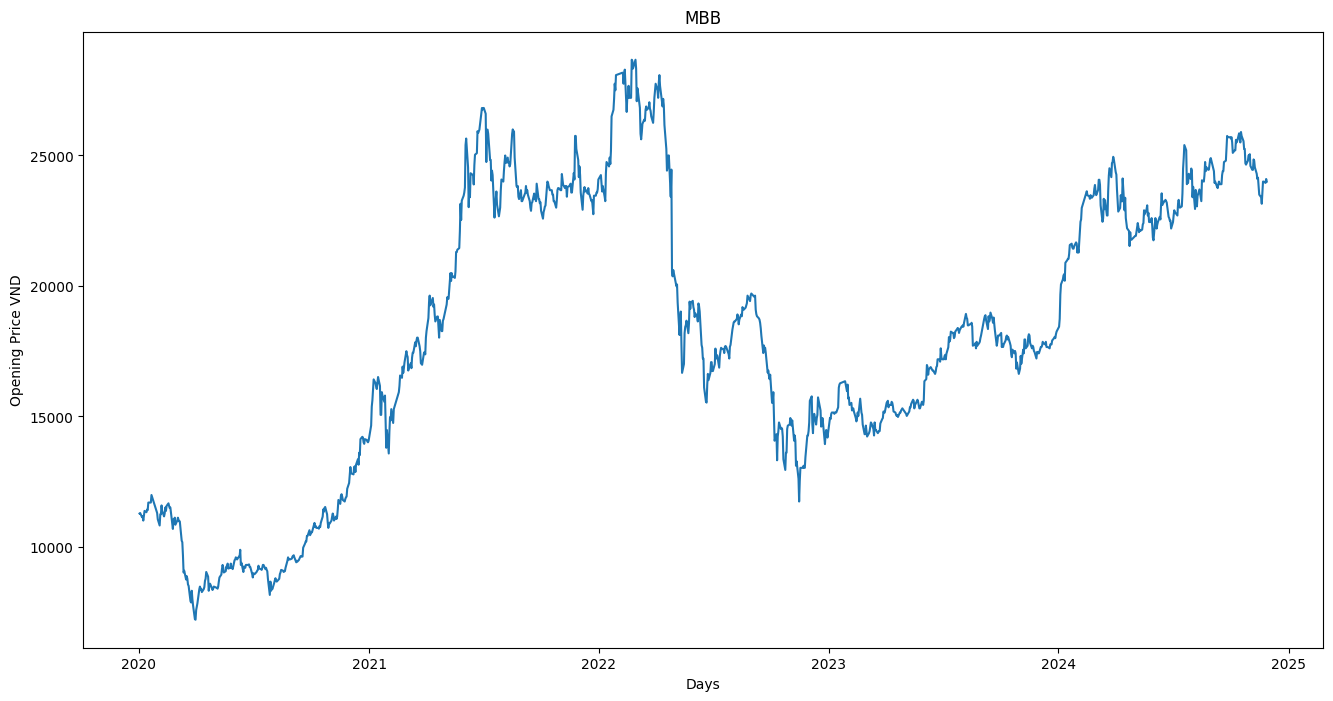

In [ ]:
plt.figure(figsize=(16,8))
plt.title('MBBank')
plt.xlabel('Days')
plt.ylabel('Opening Price VND')
# plt.plot(df['Price'])
plt.plot(df["Date"], df["Price"], label="Price")
plt.show()

In [ ]:
features = ['Open', 'High', 'Low','Vol','Change']
target = 'Price'